In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [112]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [113]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


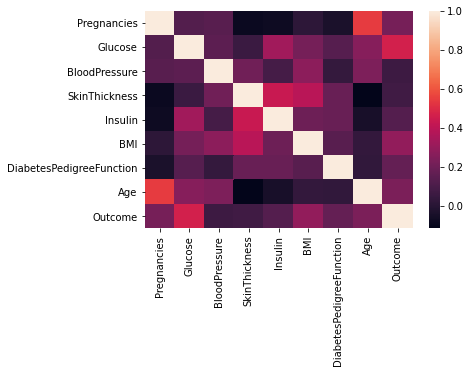

In [116]:
import seaborn as sns
sns.heatmap(df.corr())

In [117]:
corr = df.corr()

In [118]:
## corr value less than 0.8 selected
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = Falseselected_columns = df.columns[columns] = df[selected_columns]

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
y = df.Outcome.values

In [121]:
X=df.drop(columns=['Outcome'],axis=1).values

In [122]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [123]:
X_trans.shape

(768, 8)

In [124]:
y.shape

(768,)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=40, test_size=0.2)

In [126]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [127]:
matrix = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print (matrix)

0.7662337662337663
[[87  8]
 [28 31]]


In [128]:

def cparameter(i):
    model = SVC(kernel='linear',C=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print (matrix)


In [141]:
l = [0.1,0.2,0.3,0.5,1,5,10,50,100,1000]
for i in l:
    print("for the value of c = ", i)
    cparameter(i)

for the value of c =  0.1
0.6363636363636364
[[94  1]
 [55  4]]
for the value of c =  0.2
0.7532467532467533
[[91  4]
 [34 25]]
for the value of c =  0.3
0.7532467532467533
[[89  6]
 [32 27]]
for the value of c =  0.5
0.7597402597402597
[[89  6]
 [31 28]]
for the value of c =  1
0.7467532467532467
[[85 10]
 [29 30]]
for the value of c =  5
0.7467532467532467
[[85 10]
 [29 30]]
for the value of c =  10
0.7662337662337663
[[87  8]
 [28 31]]
for the value of c =  50
0.7662337662337663
[[87  8]
 [28 31]]
for the value of c =  100
0.7662337662337663
[[87  8]
 [28 31]]
for the value of c =  1000
0.7597402597402597
[[86  9]
 [28 31]]


In [130]:
# # for the value of c=10 accuracy 

In [131]:
param_grid = [
  {'C': [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5, 10, 15,20,50, 100, 1000], 'gamma': [0.01,0.001, 0.0001], 'kernel': ['linear','rbf','poly','sigmoid','cosine']},
 ]

In [132]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid=param_grid, cv=10, n_jobs=-1)

In [133]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(C=10, kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 15,
                                20, 50, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid',
                                     'cosine']}])

In [134]:
y_pred=grid.predict(X_test)

In [135]:
matrix = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print (matrix)

0.7467532467532467
[[85 10]
 [29 30]]


In [136]:
grid.best_score_

0.7849286092014807

In [137]:
grid.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'linear'}

In [138]:
grid.best_estimator_

SVC(C=5, gamma=0.01, kernel='linear')